In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv


# Understanding & Analyzing the Dataset

In [2]:
df = pd.read_csv('/kaggle/input/bank-transaction-dataset-for-fraud-detection/bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

In [4]:
df.nunique()

TransactionID              2512
AccountID                   495
TransactionAmount          2455
TransactionDate            2512
TransactionType               2
Location                     43
DeviceID                    681
IP Address                  592
MerchantID                  100
Channel                       3
CustomerAge                  63
CustomerOccupation            4
TransactionDuration         288
LoginAttempts                 5
AccountBalance             2510
PreviousTransactionDate     360
dtype: int64

In [5]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

print(df['TransactionDate'].dtype)

datetime64[ns]


In [6]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

print(df['PreviousTransactionDate'].dtype)

datetime64[ns]


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   TransactionID            2512 non-null   object        
 1   AccountID                2512 non-null   object        
 2   TransactionAmount        2512 non-null   float64       
 3   TransactionDate          2512 non-null   datetime64[ns]
 4   TransactionType          2512 non-null   object        
 5   Location                 2512 non-null   object        
 6   DeviceID                 2512 non-null   object        
 7   IP Address               2512 non-null   object        
 8   MerchantID               2512 non-null   object        
 9   Channel                  2512 non-null   object        
 10  CustomerAge              2512 non-null   int64         
 11  CustomerOccupation       2512 non-null   object        
 12  TransactionDuration      2512 non-

In [8]:
print("Unique value:\n", df['TransactionID'].unique())

Unique value:
 ['TX000001' 'TX000002' 'TX000003' ... 'TX002510' 'TX002511' 'TX002512']


In [9]:
print("Unique value:\n", df['AccountID'].unique())

Unique value:
 ['AC00128' 'AC00455' 'AC00019' 'AC00070' 'AC00411' 'AC00393' 'AC00199'
 'AC00069' 'AC00135' 'AC00385' 'AC00150' 'AC00459' 'AC00392' 'AC00264'
 'AC00085' 'AC00270' 'AC00317' 'AC00359' 'AC00242' 'AC00285' 'AC00002'
 'AC00014' 'AC00095' 'AC00453' 'AC00241' 'AC00041' 'AC00441' 'AC00057'
 'AC00390' 'AC00313' 'AC00367' 'AC00291' 'AC00060' 'AC00365' 'AC00267'
 'AC00404' 'AC00202' 'AC00478' 'AC00405' 'AC00421' 'AC00480' 'AC00120'
 'AC00117' 'AC00011' 'AC00401' 'AC00282' 'AC00439' 'AC00296' 'AC00471'
 'AC00159' 'AC00482' 'AC00115' 'AC00055' 'AC00419' 'AC00374' 'AC00271'
 'AC00456' 'AC00143' 'AC00427' 'AC00438' 'AC00425' 'AC00325' 'AC00434'
 'AC00319' 'AC00460' 'AC00461' 'AC00395' 'AC00217' 'AC00053' 'AC00110'
 'AC00265' 'AC00239' 'AC00007' 'AC00022' 'AC00464' 'AC00406' 'AC00445'
 'AC00236' 'AC00220' 'AC00140' 'AC00098' 'AC00303' 'AC00373' 'AC00437'
 'AC00106' 'AC00310' 'AC00149' 'AC00010' 'AC00348' 'AC00178' 'AC00018'
 'AC00075' 'AC00170' 'AC00235' 'AC00013' 'AC00397' 'AC00423' '

In [10]:
df['TransactionDuration'].describe()

count    2512.000000
mean      119.643312
std        69.963757
min        10.000000
25%        63.000000
50%       112.500000
75%       161.000000
max       300.000000
Name: TransactionDuration, dtype: float64

In [11]:
df['LoginAttempts'].describe()

count    2512.000000
mean        1.124602
std         0.602662
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         5.000000
Name: LoginAttempts, dtype: float64

In [12]:
Q1 = df['TransactionDuration'].quantile(0.25)
Q3 = df['TransactionDuration'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['TransactionDuration'] < Q1 - 1.5 * IQR) | (df['TransactionDuration'] > Q3 + 1.5 * IQR)]
print(outliers)

Empty DataFrame
Columns: [TransactionID, AccountID, TransactionAmount, TransactionDate, TransactionType, Location, DeviceID, IP Address, MerchantID, Channel, CustomerAge, CustomerOccupation, TransactionDuration, LoginAttempts, AccountBalance, PreviousTransactionDate]
Index: []


In [13]:
Q1 = df['LoginAttempts'].quantile(0.25)
Q3 = df['LoginAttempts'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['LoginAttempts'] < Q1 - 1.5 * IQR) | (df['LoginAttempts'] > Q3 + 1.5 * IQR)]
print(outliers)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
23        TX000024   AC00453             345.84 2023-05-02 18:25:46   
26        TX000027   AC00441             246.93 2023-04-17 16:37:01   
32        TX000033   AC00060             396.45 2023-09-25 16:26:00   
38        TX000039   AC00478             795.31 2023-10-12 17:07:40   
61        TX000062   AC00002             263.99 2023-05-16 16:07:30   
...            ...       ...                ...                 ...   
2423      TX002424   AC00340             332.06 2023-06-21 16:38:54   
2445      TX002446   AC00439             403.01 2023-09-04 17:32:35   
2455      TX002456   AC00043             655.81 2023-05-05 16:52:44   
2457      TX002458   AC00315              79.92 2023-02-06 17:32:11   
2492      TX002493   AC00057             267.48 2023-01-30 17:05:46   

     TransactionType     Location DeviceID      IP Address MerchantID Channel  \
23             Debit   Fort Worth  D000162  191.82.103.198       M

In [14]:
df.isnull().sum()

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64

In [15]:
login_gt_one = df[df['LoginAttempts'] > 1]

print(login_gt_one)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
23        TX000024   AC00453             345.84 2023-05-02 18:25:46   
26        TX000027   AC00441             246.93 2023-04-17 16:37:01   
32        TX000033   AC00060             396.45 2023-09-25 16:26:00   
38        TX000039   AC00478             795.31 2023-10-12 17:07:40   
61        TX000062   AC00002             263.99 2023-05-16 16:07:30   
...            ...       ...                ...                 ...   
2423      TX002424   AC00340             332.06 2023-06-21 16:38:54   
2445      TX002446   AC00439             403.01 2023-09-04 17:32:35   
2455      TX002456   AC00043             655.81 2023-05-05 16:52:44   
2457      TX002458   AC00315              79.92 2023-02-06 17:32:11   
2492      TX002493   AC00057             267.48 2023-01-30 17:05:46   

     TransactionType     Location DeviceID      IP Address MerchantID Channel  \
23             Debit   Fort Worth  D000162  191.82.103.198       M

In [16]:
total_users = len(df)

users_with_multiple_logins = len(login_gt_one)

percentage = (users_with_multiple_logins / total_users) * 100

print(f"Percentage of users with more than 1 login: {percentage:.2f}%")

Percentage of users with more than 1 login: 4.86%


# 1. Transactional Patterns

In [17]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [18]:
daily_transactions = df.groupby(df['TransactionDate'].dt.date)['TransactionID'].count()
print(daily_transactions)

monthly_transactions = df.groupby(df['TransactionDate'].dt.to_period('M'))['TransactionID'].count()
print(monthly_transactions)

TransactionDate
2023-01-02    19
2023-01-03     9
2023-01-04     4
2023-01-05     8
2023-01-06     7
              ..
2023-12-26     5
2023-12-27     4
2023-12-28     7
2023-12-29     9
2024-01-01    13
Name: TransactionID, Length: 261, dtype: int64
TransactionDate
2023-01    207
2023-02    218
2023-03    197
2023-04    161
2023-05    220
2023-06    212
2023-07    195
2023-08    224
2023-09    214
2023-10    226
2023-11    221
2023-12    204
2024-01     13
Freq: M, Name: TransactionID, dtype: int64


In [19]:
transaction_type_dist = df['TransactionType'].value_counts()
print(transaction_type_dist)

TransactionType
Debit     1944
Credit     568
Name: count, dtype: int64


In [20]:
df['Hour'] = df['TransactionDate'].dt.hour

transactions_per_hour = df.groupby('Hour')['TransactionID'].count()
print(transactions_per_hour)

Hour
16    1316
17     819
18     377
Name: TransactionID, dtype: int64


In [21]:
df['DayOfWeek'] = df['TransactionDate'].dt.day_name()

transactions_per_day = df['DayOfWeek'].value_counts()
print(transactions_per_day)

DayOfWeek
Monday       1070
Friday        373
Thursday      368
Tuesday       360
Wednesday     341
Name: count, dtype: int64


In [22]:
location_analysis = df['Location'].value_counts()
print(location_analysis)

Location
Fort Worth          70
Los Angeles         69
Oklahoma City       68
Charlotte           68
Tucson              67
Philadelphia        67
Omaha               65
Miami               64
Detroit             63
Houston             63
Memphis             63
Denver              62
Kansas City         61
Boston              61
Mesa                61
Atlanta             61
Seattle             61
Colorado Springs    60
Jacksonville        60
Fresno              60
Chicago             60
Austin              59
San Jose            59
Raleigh             59
San Antonio         59
San Diego           59
Indianapolis        58
New York            58
San Francisco       57
Nashville           55
Milwaukee           55
Las Vegas           55
Virginia Beach      55
Phoenix             55
Columbus            54
Sacramento          53
Baltimore           51
Louisville          51
Dallas              49
Washington          48
El Paso             46
Portland            42
Albuquerque         41
Na

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


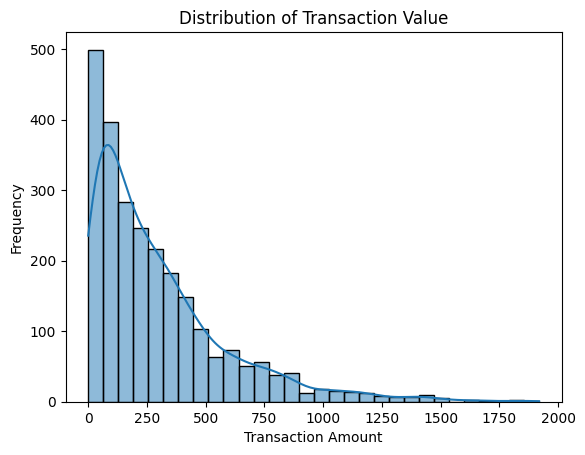

In [23]:
sns.histplot(df['TransactionAmount'], kde=True, bins=30)
plt.title('Distribution of Transaction Value')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [24]:
merchant_analysis = df.groupby('MerchantID')['TransactionAmount'].sum().sort_values(ascending=False)
print(merchant_analysis)

MerchantID
M026    13865.15
M066    11948.75
M005    11099.93
M048    10954.79
M009    10526.04
          ...   
M090     4212.78
M022     3522.76
M063     3202.42
M069     2868.59
M079     2095.33
Name: TransactionAmount, Length: 100, dtype: float64


In [25]:
account_activity = df.groupby('AccountID')['TransactionID'].count()
print(account_activity.sort_values(ascending=False).head(10))

AccountID
AC00202    12
AC00460    12
AC00363    12
AC00362    12
AC00456    11
AC00480    11
AC00257    11
AC00304    11
AC00225    11
AC00063    10
Name: TransactionID, dtype: int64


In [26]:
high_value_accounts = df[df['TransactionAmount'] > 1000].groupby('AccountID')['TransactionAmount'].sum()
print(high_value_accounts)

AccountID
AC00010    1086.60
AC00016    1105.88
AC00018    1228.81
AC00021    1142.83
AC00028    1664.33
            ...   
AC00464    1431.30
AC00466    1342.25
AC00480    1087.90
AC00494    1142.76
AC00498    1095.09
Name: TransactionAmount, Length: 87, dtype: float64


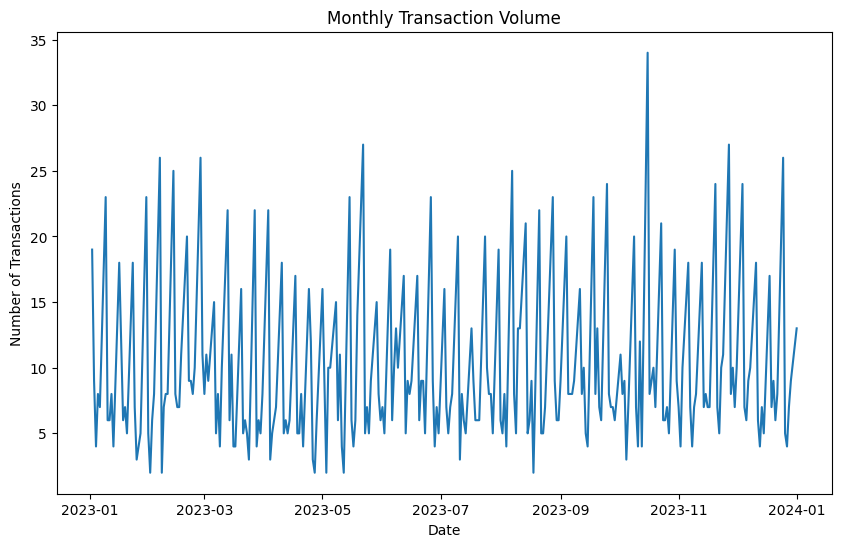

In [27]:
daily_transactions.plot(kind='line', figsize=(10, 6), title='Monthly Transaction Volume')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.show()

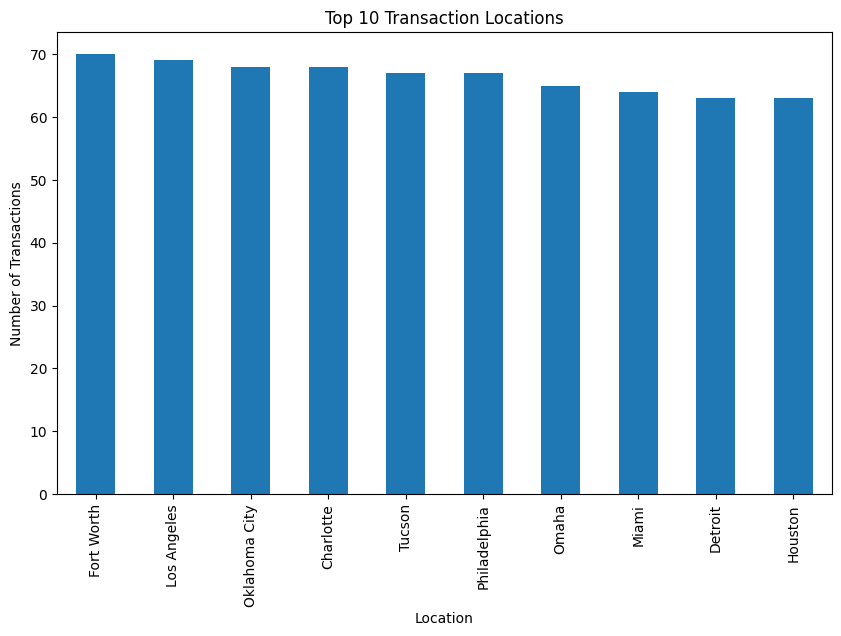

In [28]:
location_analysis.head(10).plot(kind='bar', figsize=(10, 6), title='Top 10 Transaction Locations')
plt.xlabel('Location')
plt.ylabel('Number of Transactions')
plt.show()

# 2. Detect Fraud

In [29]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Hour,DayOfWeek
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,16,Tuesday
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,16,Tuesday
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,18,Monday
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,16,Friday
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,17,Monday


In [30]:
print(df['TransactionAmount'].describe())

lower_bound = df['TransactionAmount'].mean() - 3 * df['TransactionAmount'].std()
upper_bound = df['TransactionAmount'].mean() + 3 * df['TransactionAmount'].std()

suspicious_transactions = df[(df['TransactionAmount'] < lower_bound) | (df['TransactionAmount'] > upper_bound)]
print(suspicious_transactions)

count    2512.000000
mean      297.593778
std       291.946243
min         0.260000
25%        81.885000
50%       211.140000
75%       414.527500
max      1919.110000
Name: TransactionAmount, dtype: float64
     TransactionID AccountID  TransactionAmount     TransactionDate  \
74        TX000075   AC00265            1212.51 2023-10-04 16:36:29   
85        TX000086   AC00098            1340.19 2023-09-29 17:22:10   
176       TX000177   AC00363            1362.55 2023-02-10 18:07:07   
190       TX000191   AC00396            1422.55 2023-07-10 17:49:18   
274       TX000275   AC00454            1176.28 2023-12-20 16:08:02   
311       TX000312   AC00285            1221.65 2023-09-27 16:55:35   
340       TX000341   AC00107            1830.00 2023-03-01 16:31:58   
344       TX000345   AC00156            1271.90 2023-08-28 16:43:15   
375       TX000376   AC00316            1392.54 2023-11-20 16:51:14   
440       TX000441   AC00040            1237.56 2023-11-13 17:49:04   
475       T

In [31]:
suspicious_logins = df[df['LoginAttempts'] > 3]
print(suspicious_logins)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
26        TX000027   AC00441             246.93 2023-04-17 16:37:01   
91        TX000092   AC00310             223.85 2023-10-02 16:36:10   
147       TX000148   AC00161             514.95 2023-04-13 18:37:48   
266       TX000267   AC00178              66.90 2023-04-17 16:50:45   
274       TX000275   AC00454            1176.28 2023-12-20 16:08:02   
...            ...       ...                ...                 ...   
2262      TX002263   AC00279              15.81 2023-03-02 18:36:55   
2288      TX002289   AC00149             336.01 2023-11-09 18:45:10   
2310      TX002311   AC00243             176.52 2023-03-14 17:06:18   
2371      TX002372   AC00465              21.23 2023-09-11 16:35:15   
2423      TX002424   AC00340             332.06 2023-06-21 16:38:54   

     TransactionType          Location DeviceID       IP Address MerchantID  \
26             Debit             Miami  D000046   55.154.161.250    

In [32]:
unusual_locations = df.groupby('AccountID')['Location'].nunique()
unusual_accounts = unusual_locations[unusual_locations > 1]
print(unusual_accounts)

AccountID
AC00001    2
AC00002    7
AC00003    5
AC00004    9
AC00005    9
          ..
AC00496    3
AC00497    6
AC00498    8
AC00499    7
AC00500    3
Name: Location, Length: 470, dtype: int64


In [33]:
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])

df['TimeDelta'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.total_seconds()

suspicious_time_gap = df[df['TimeDelta'] < 60]
print(suspicious_time_gap)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
0         TX000001   AC00128              14.09 2023-04-11 16:29:14   
1         TX000002   AC00455             376.24 2023-06-27 16:44:19   
2         TX000003   AC00019             126.29 2023-07-10 18:16:08   
3         TX000004   AC00070             184.50 2023-05-05 16:32:11   
4         TX000005   AC00411              13.45 2023-10-16 17:51:24   
...            ...       ...                ...                 ...   
2507      TX002508   AC00297             856.21 2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54 2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63 2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97 2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08 2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.218.92      

In [34]:
preferred_merchants = df.groupby('AccountID')['MerchantID'].apply(lambda x: x.mode()[0])

df['PreferredMerchant'] = df['AccountID'].map(preferred_merchants)
unusual_merchant_transactions = df[df['MerchantID'] != df['PreferredMerchant']]
print(unusual_merchant_transactions)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
1         TX000002   AC00455             376.24 2023-06-27 16:44:19   
4         TX000005   AC00411              13.45 2023-10-16 17:51:24   
5         TX000006   AC00393              92.15 2023-04-03 17:15:01   
7         TX000008   AC00069             171.42 2023-05-08 17:47:59   
10        TX000011   AC00150              17.78 2023-03-14 16:46:10   
...            ...       ...                ...                 ...   
2507      TX002508   AC00297             856.21 2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54 2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63 2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97 2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08 2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
1              Debit           Houston  D000051     13.149.61.4      

In [35]:
from sklearn.ensemble import IsolationForest

features = ['TransactionAmount', 'AccountBalance', 'TransactionDuration', 'TimeDelta']
df_features = df[features].dropna()

model = IsolationForest(contamination=0.02)
df['Anomaly'] = model.fit_predict(df_features)

fraud_transactions = df[df['Anomaly'] == -1]
print(fraud_transactions)

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


     TransactionID AccountID  TransactionAmount     TransactionDate  \
74        TX000075   AC00265            1212.51 2023-10-04 16:36:29   
85        TX000086   AC00098            1340.19 2023-09-29 17:22:10   
146       TX000147   AC00385             973.39 2023-08-30 17:23:20   
176       TX000177   AC00363            1362.55 2023-02-10 18:07:07   
190       TX000191   AC00396            1422.55 2023-07-10 17:49:18   
274       TX000275   AC00454            1176.28 2023-12-20 16:08:02   
340       TX000341   AC00107            1830.00 2023-03-01 16:31:58   
375       TX000376   AC00316            1392.54 2023-11-20 16:51:14   
475       TX000476   AC00464            1431.30 2023-09-04 18:46:40   
486       TX000487   AC00148            1416.69 2023-01-16 17:00:11   
535       TX000536   AC00161            1182.86 2023-12-11 16:06:51   
614       TX000615   AC00466            1342.25 2023-04-28 18:11:55   
653       TX000654   AC00423            1919.11 2023-06-27 17:48:25   
671   

In [36]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_features)

dbscan = DBSCAN(eps=0.5, min_samples=5).fit(scaled_features)
df['Cluster'] = dbscan.labels_

fraud_clusters = df[df['Cluster'] == -1]
print(fraud_clusters)

     TransactionID AccountID  TransactionAmount     TransactionDate  \
1         TX000002   AC00455             376.24 2023-06-27 16:44:19   
6         TX000007   AC00199               7.08 2023-02-15 16:36:48   
9         TX000010   AC00385             815.96 2023-03-31 16:06:57   
17        TX000018   AC00359             492.93 2023-12-14 18:32:14   
33        TX000034   AC00359             877.81 2023-03-13 17:23:24   
...            ...       ...                ...                 ...   
2468      TX002469   AC00284             768.94 2023-10-11 17:36:16   
2474      TX002475   AC00302             865.17 2023-12-07 17:13:16   
2500      TX002501   AC00375             325.60 2023-09-26 16:15:36   
2502      TX002503   AC00069             603.54 2023-04-21 16:22:38   
2507      TX002508   AC00297             856.21 2023-04-26 17:09:36   

     TransactionType          Location DeviceID       IP Address MerchantID  \
1              Debit           Houston  D000051      13.149.61.4    